In [ ]:
from bs4 import BeautifulSoup
from urllib.request import urlopen # url 입력하면 html 가져옴

response = urlopen('https://www.daum.net/')
soup = BeautifulSoup(response, 'html.parser') # html 파일에서 원하는 부분만 가져옴
for anchor in soup.select("a.link_favorsch"): # ~라는 이름의 class를 가지고 오겠다
  print(anchor)

<a class="link_favorsch @1" href="https://search.daum.net/search?w=tot&amp;q=%EC%BD%94%EB%A1%9C%EB%82%9819+%EB%B0%9C%EC%83%9D%ED%98%84%ED%99%A9&amp;DA=NPI">코로나19 발생현황</a>
<a class="link_favorsch @2" href="https://search.daum.net/search?w=tot&amp;q=%EB%A6%AC%ED%95%9C%EB%82%98+%EC%97%B4%EC%95%A0&amp;DA=NPI&amp;rtmaxcoll=NNS">리한나 열애</a>
<a class="link_favorsch @3" href="https://search.daum.net/search?w=tot&amp;q=%EC%A0%9C%EC%A3%BC%EB%8F%84%EB%A0%8C%ED%8A%B8%EC%B9%B4%EB%B9%84%EA%B5%90%EC%82%AC%EC%9D%B4%ED%8A%B8&amp;DA=NPT">제주도렌트카비교</a>
<a class="link_favorsch @4" href="https://search.daum.net/search?w=tot&amp;q=%EC%98%A5%ED%83%9D%EC%97%B0+%EC%B6%9C%EC%97%B0%ED%99%95%EC%A0%95&amp;DA=NPI&amp;rtmaxcoll=NNS">옥택연 출연확정</a>
<a class="link_favorsch @5" href="https://search.daum.net/search?w=tot&amp;q=%EC%8A%A4%ED%84%B0%EB%94%94%EC%B9%B4%ED%8E%98&amp;DA=NPT">스터디카페</a>
<a class="link_favorsch @6" href="https://search.daum.net/search?w=tot&amp;q=%EC%82%AC%ED%9A%8C%EC%A0%81+%EA%B1%B0%EB%A6%AC%EB%91%90

In [ ]:
!pip install selenium # 커서 내리기
!apt-get update
!apt install chromium-chromedriver

     |████████████████████████████████| 911kB 25.4MB/s 
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ 

In [ ]:
# 로컬이 아니라 colab이라서 필요한 설정들
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [ ]:
# 본인 드라이브와 연동 필요!

In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.parse import quote_plus
import time

browser = webdriver.Chrome('chromedriver', options=chrome_options)

key_word = '아이유' # 검색할 단어
download_image_count = 400 # 가져올 개수

main_url = f'https://www.google.com/search?q={quote_plus(key_word)}&source=source=lnms&tbm=isch&sa=X'
browser.get(main_url)
time.sleep(2) # 기다리기
for i in range(download_image_count):
  browser.execute_script('window.scrollBy(0,10000)')

html = browser.page_source # html 형식
soup = BeautifulSoup(html)
img = soup.select('.rg_i.Q4LuWd') # ~가 클래스명인 tag를 가져오겠다

imgurl = [] # url만 저장할 list
for i in img:
  try:
    imgurl.append(i.attrs['src']) # src만 추가
  except KeyError:
    imgurl.append(i.attrs['data-src'])

n = 1
for i in imgurl:
  with urlopen(i) as f:
    with open("/content/drive/MyDrive/Colab Notebooks/DL_Seminar/celeb_project_4/image/iu/" + key_word + str(n) + ".jpg", "wb") as h:
      current_img = f.read()
      h.write(current_img)

  n += 1
  time.sleep(0.1)

browser.close()


In [ ]:
import os
print(len(os.listdir("/content/drive/MyDrive/Colab Notebooks/DL_Seminar/celeb_project_4/image/sana")))

400


In [ ]:
# 데이터 전처리 필요 (얼굴 부분만 가져오게)
!pip install face_recognition

     |████████████████████████████████| 100.2MB 117kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=783b0ac99b44ef50d8d7b19856237a7da0bb2ed0f0610e7c899275d3fabd52de
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks/DL_Seminar/celeb_project_4'

/content/drive/MyDrive/Colab Notebooks/DL_Seminar/celeb_project_4


In [ ]:
import os # os는 파일 관리할 때 사용

os.makedirs('./train/sana_face') # 얼굴 사진만 저장할 폴더
os.makedirs('./train/iu_face')

In [ ]:
sana_dir = './image/sana'
iu_dir = './image/iu'
sana_images = os.listdir(sana_dir) # 파일명을 list로 가짐
iu_images = os.listdir(iu_dir)

In [ ]:
from PIL import Image # jpg 파일 가져올 때 필요함
import face_recognition as FR

In [ ]:
for file in iu_images:
  image = FR.load_image_file(os.path.join(iu_dir, file))
  faces = FR.face_locations(image, number_of_times_to_upsample=0, model='hog')
  if len(faces) != 1:
    continue

  for T,R,B,L in faces:
    crop = image[T:B, L:R]
    resized = Image.fromarray(crop).resize((256,256), Image.BICUBIC)
    resized.save(os.path.join('./train/iu_face', file))

In [ ]:
print(len(os.listdir("/content/drive/MyDrive/Colab Notebooks/DL_Seminar/celeb_project_4/train/sana_face")))

168


In [ ]:
# 모델 만들어서 훈련하기
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1, vertical_flip=True)

In [ ]:
train_generator = gen.flow_from_directory('./train', batch_size=5, class_mode='binary')

Found 354 images belonging to 2 classes.


In [ ]:
model = Sequential() 

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(256,256,3)))
#254*254*16
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Flatten()) 
model.add(Dense(256, activation='relu'))  
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
# 훈련
model.fit(train_generator, epochs=50)

Epoch 1/50
71/71 [==============================] - 38s 77ms/step - loss: 0.7820 - accuracy: 0.5237
Epoch 2/50
71/71 [==============================] - 5s 74ms/step - loss: 0.7249 - accuracy: 0.5659
Epoch 3/50
71/71 [==============================] - 5s 75ms/step - loss: 0.6741 - accuracy: 0.5710
Epoch 4/50
71/71 [==============================] - 5s 74ms/step - loss: 0.6389 - accuracy: 0.5932
Epoch 5/50
71/71 [==============================] - 5s 74ms/step - loss: 0.6414 - accuracy: 0.6808
Epoch 6/50
71/71 [==============================] - 5s 75ms/step - loss: 0.6778 - accuracy: 0.6443
Epoch 7/50
71/71 [==============================] - 5s 76ms/step - loss: 0.6108 - accuracy: 0.6642
Epoch 8/50
71/71 [==============================] - 5s 75ms/step - loss: 0.6165 - accuracy: 0.6933
Epoch 9/50
71/71 [==============================] - 5s 75ms/step - loss: 0.6312 - accuracy: 0.6588
Epoch 10/50
71/71 [==============================] - 5s 74ms/step - loss: 0.5921 - accuracy: 0.6928
Epoch 11

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def predict(model,path):
    label = ['사나','아이유']
    image = FR.load_image_file(path)
    faces = FR.face_locations(image, number_of_times_to_upsample=0, model="hog")
    if len(faces) != 1 :
            print('얼굴을 찾을 수 없습니다.')
            return
    for T, R, B, L in faces:
            crop  = image[T:B, L:R]
            resized = Image.fromarray(crop).resize((256,256), Image.BICUBIC)
            result = model.predict(np.array(resized).reshape(1,256,256,3)/255.)
            print('sana일 확률 : ', result[0], 'iu일 확률 : ', 1-result[0])
            plt.imshow(resized)
            plt.show

sana일 확률 :  [0.15594052] iu일 확률 :  [0.84405947]


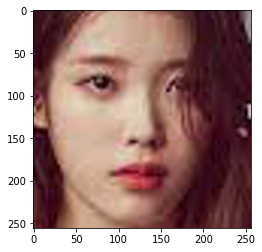

In [ ]:
predict(model, '/content/drive/MyDrive/Colab Notebooks/DL_Seminar/celeb_project_4/image/iu/아이유1.jpg')